Import required libraries for the analysis


In [1]:
# downloaded packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# python packages
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


Import the train dataset and test dataset from the csv file


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


train_original = train.copy()
test_original = test.copy()


Combine Train and Test dataset for pre-processing stage


In [3]:
combine = pd.concat([train, test], ignore_index=True, sort=True)
combine.head()
combine.tail()


,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


Removing Twitter Handles (@user)
Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.


In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt


In [5]:
combine['Tidy_Tweets'] = np.vectorize(
    remove_pattern)(combine['tweet'], "@[\w]*")
combine.head()


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Removing Punctuations, Numbers, and Special Characters


In [6]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace(
    "[^a-zA-Z#]", " ", regex=True)

combine.head(10)


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


Removing Short Words


In [7]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(
    lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

combine.head(10)


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


Tokenization
Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.


In [8]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()


0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

Stemming
Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”


In [9]:
from nltk import PorterStemmer

stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

tokenized_tweet.head()


0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

stiching the tokens back together.


In [10]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()


,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


WordCloud
A word cloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.


In [11]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests


Store all the words from the tweets in a single list


In [12]:
all_words_positive = ' '.join(
    text for text in combine['Tidy_Tweets'][combine['label'] == 0])


We can see most of the words are positive or neutral. With happy, smile, and love being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is non racist/sexists tweets.


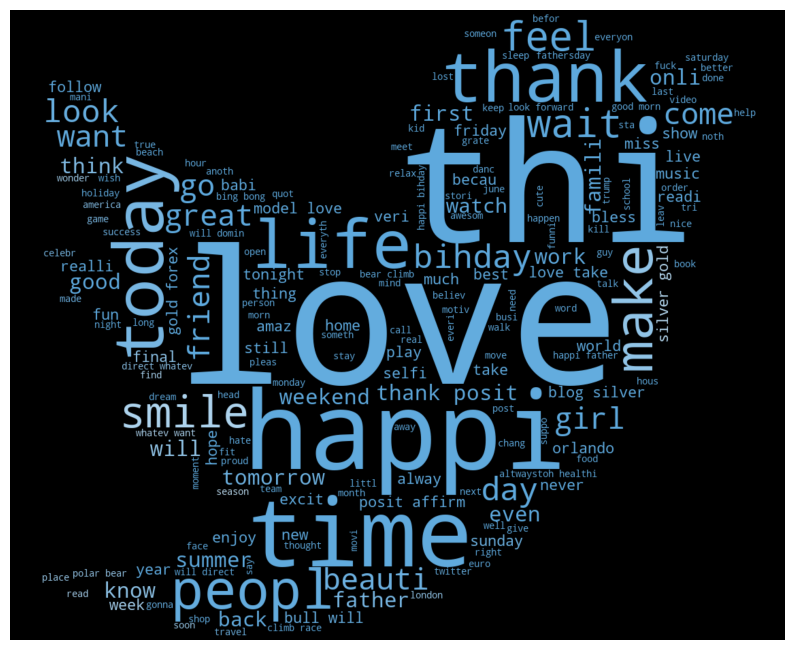

In [13]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get(
    'http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500,
               width=4000, mask=Mask).generate(all_words_positive)

# Size of the image generated
plt.figure(figsize=(10, 20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")

plt.axis('off')
plt.show()


Store all the words from the dataset which are racist/sexist


In [14]:
all_words_negative = ' '.join(
    text for text in combine['Tidy_Tweets'][combine['label'] == 1])


As we can clearly see from the word cloud, most of the words are negative. With hate, black, and kill being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is racist/sexists tweets.


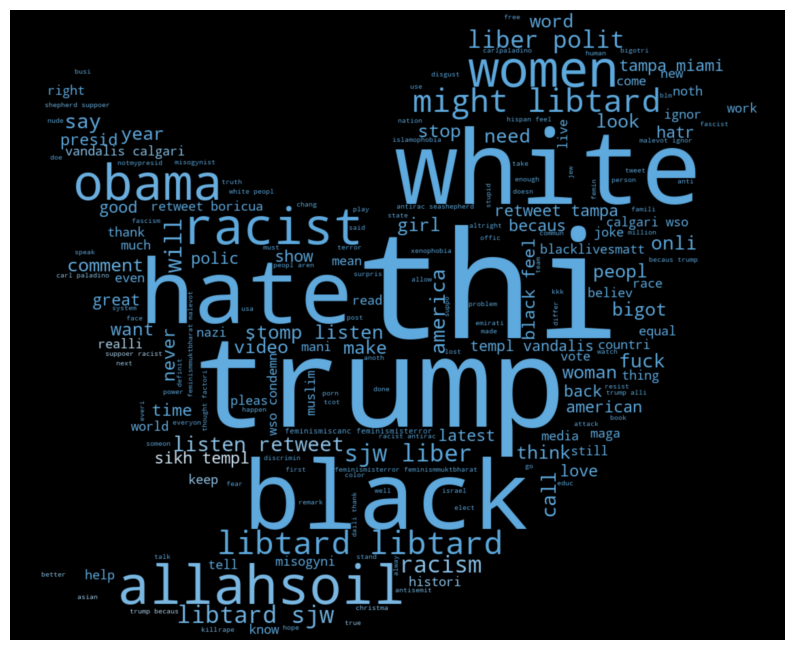

In [15]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get(
    'http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500,
               width=4000, mask=Mask).generate(all_words_negative)

# Size of the image generated
plt.figure(figsize=(10, 20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors), interpolation="gaussian")

plt.axis('off')
plt.show()


Function to extract hashtags from tweets


In [16]:
def Hashtags_extract(x):
    hashtags = []

    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


A nested list of all the hashtags from the positive reviews from the dataset


In [17]:
ht_positive = Hashtags_extract(combine['Tidy_Tweets'][combine['label'] == 0])
ht_positive


[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

Unnest the list


In [18]:
ht_positive_unnest = sum(ht_positive, [])


A nested list of all the hashtags from the negative reviews from the dataset


In [19]:
# A nested list of all the hashtags from the negative reviews from the dataset.
ht_negative = Hashtags_extract(combine['Tidy_Tweets'][combine['label'] == 1])

ht_negative


[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [20]:
# unnest the list
ht_negative_unnest = sum(ht_negative, [])


In [21]:
# Counting the frequency of the words having Positive Sentiment
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive


FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

Creating a dataframe for the most used words in hashtags


In [22]:
# Creating a dataframe for the most frequently used words in hashtags
df_positive = pd.DataFrame({'Hashtags': list(
    word_freq_positive.keys()), 'Count': list(word_freq_positive.values())})

df_positive.head(10)


,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


Plotting the barplot for the 15 most frequent words used for hashtags


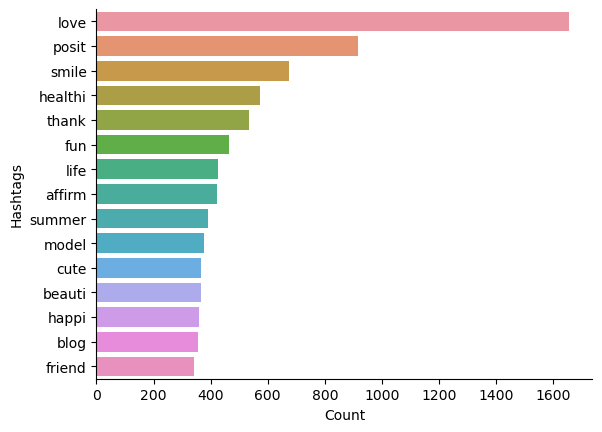

In [23]:
df_positive_plot = df_positive.nlargest(15, columns='Count')

sns.barplot(data=df_positive_plot, y='Hashtags', x='Count')
sns.despine()


Counting the frequency of the words having Negative Sentiment


In [24]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative


FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

Creating a dataframe for the most frequently used words in hashtags


In [25]:
df_negative = pd.DataFrame({'Hashtags': list(
    word_freq_negative.keys()), 'Count': list(word_freq_negative.values())})

df_negative.head(10)


,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


Plotting the barplot for the 15 most frequent words used for hashtags


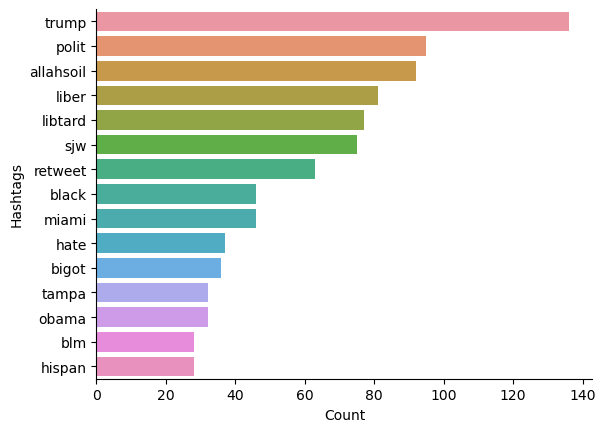

In [26]:
df_negative_plot = df_negative.nlargest(15, columns='Count')

sns.barplot(data=df_negative_plot, y='Hashtags', x='Count')
sns.despine()


TF-IDF Features
TF-IDF stands for Term Frequency-Inverse Document Frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.90, min_df=2, max_features=1000, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Applying Machine Learning Models
Logistic Regression
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.


Using features from TF-IDF for training set


In [28]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Splitting the data into training and validation set


In [29]:
from sklearn.model_selection import train_test_split


Using TF-IDF features


In [30]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(
    train_tfidf_matrix, train['label'], test_size=0.3, random_state=17)


Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression


**Make an Instance of the Model**

In [32]:
Log_Reg = LogisticRegression(random_state=0, solver='lbfgs')
#train the model using tfidf features
Log_Reg.fit(x_train_tfidf, y_train_tfidf)

LogisticRegression(random_state=0)

Calculate the F1 score for the validation set


In [33]:
from sklearn.metrics import f1_score

In [34]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf


array([[0.98487907, 0.01512093],
       [0.97949889, 0.02050111],
       [0.9419737 , 0.0580263 ],
       ...,
       [0.98630906, 0.01369094],
       [0.96746188, 0.03253812],
       [0.99055287, 0.00944713]])

Calculating the f1 score for the validation set


In [35]:
prediction_int = prediction_tfidf[:, 1] >= 0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf


0.5862068965517241

Using the best possible model to predict for the test data
From the above comaprison graph we can see that Logistic Regression trained using TF-IDF features gives us the best performance

In [36]:
test_tfidf = tfidf_matrix[31962:]

test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('result.csv', index=False)

Test Dataset after prediction

In [37]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


**Saving the ML model**

In [38]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(Log_Reg, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = pickle_model.score(x_valid_tfidf, y_valid_tfidf)

In [39]:
# function that takes in a string and predicts whether it is positive or negative
def analyseString(input_tweet):
    new_string_matrix = tfidf_vectorizer.transform([input_tweet])
    new_pred = pickle_model.predict_proba(new_string_matrix)
    new_pred_int = new_pred[:,1] >= 0.3
    new_pred_int = new_pred_int.astype(np.int)
    if new_pred_int == 1:
        return("This is a negative tweet")
    else:
        return("This is a positive tweet")

In [47]:
# load new model from pickle file
with open("pickle_model.pkl", 'rb') as file:
    model = pickle.load(file)

In [48]:
def analyseString(input_tweet):
    new_string_matrix = tfidf_vectorizer.transform([input_tweet])
    new_pred = model.predict_proba(new_string_matrix)
    new_pred_int = new_pred[:,1] >= 0.3
    new_pred_int = new_pred_int.astype(np.int)
    if new_pred_int == 1:
        return("This is a negative tweet")
    else:
        return("This is a positive tweet")

In [49]:
print(analyseString("I am happy today"))

This is a positive tweet


Summary
From the given dataset we were able to predict on which class i.e Positive or Negative does the given tweet fall into.The following data was collected from Analytics Vidhya's site. The data was collected from Twitter and was labeled as racist or sexist tweets. The data was collected using the Twitter API. The dataset has to be cleaned and then the tweets have to be classified into racist or non racist tweets. The data was cleaned using the following steps:

Pre-processing
Removing Twitter Handles(@user)
Removing puntuation,numbers,special characters
Removing short words i.e. words with length<3
Tokenization
Stemming

**Importing gradio**

In [42]:
import gradio as gr

**Create a gradio interface**

In [50]:
interface = gr.Interface(fn=analyseString, inputs="text", outputs="text")

In [51]:
interface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
